# IS362 - Final Project - Climate Change

For this project, I will import the data from National Centers for Environmental Information: https://www.ncei.noaa.gov/
I will analyz the data gathered and see the change of the climate over the years. The data from NOAA will show if the climate change is real and should we worry about it or not.

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Below I am feeding the data over ftp and displaying underneath to a readable table. Will be listing only the last 10 years because there is a lot of data and if it is displayed will take a long time to be visable.

In [30]:
maxtemp_data = pd.read_csv('ftp://ftp.ncdc.noaa.gov/pub/data/cirs/climdiv/climdiv-tmaxdv-v1.0.0-20191104',sep='  ', header=None, names=["StateDivElemYear","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
maxtemp_data.tail(10)

C:\Users\test\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,StateDivElemYear,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
44225,5013272010,31.50,29.90,26.0,35.0,42.80,47.90,52.30,54.00,52.80,42.70,37.30,31.9
44226,5013272011,34.00,35.60,35.5,36.9,44.60,48.10,52.50,55.80,49.00,44.30,37.40,33.2
44227,5013272012,24.40,33.60,26.6,35.6,40.80,49.00,52.90,55.80,49.50,44.20,35.30,33.9
44228,5013272013,34.70,31.40,34.4,36.8,42.20,51.00,57.30,56.40,51.90,47.40,40.60,39.1
44229,5013272014,38.10,33.60,35.5,42.0,47.50,52.30,57.80,59.40,54.50,43.70,41.20,37.6
44230,5013272015,34.60,37.30,36.9,38.6,46.80,52.60,54.70,56.10,52.00,46.30,39.40,36.2
44231,5013272016,35.50,37.80,36.5,43.7,48.70,53.60,58.80,58.20,55.20,48.20,38.60,36.4
44232,5013272017,31.70,32.10,33.5,39.9,46.50,52.40,55.40,55.30,51.00,45.90,42.90,37.1
44233,5013272018,34.00,39.80,39.9,42.8,45.10,51.10,54.90,56.70,54.50,47.20,41.70,33.5
44234,5013272019,35.80,40.50,38.9,41.6,47.00,52.40,58.90,61.00,54.90,47.90 -99.90 -99.90,None,NaN


To perform further analysis I have separated data into fours colums.

In [31]:
maxtemp_data["StateDivElemYear"] = maxtemp_data.StateDivElemYear.astype(str)

maxtemp_data["State"] = maxtemp_data.StateDivElemYear.str[0] + maxtemp_data.StateDivElemYear.str[1]
maxtemp_data["Division"] = maxtemp_data.StateDivElemYear.str[2] + maxtemp_data.StateDivElemYear.str[3]
maxtemp_data["Element"] = maxtemp_data.StateDivElemYear.str[4] + maxtemp_data.StateDivElemYear.str[5]
maxtemp_data["Year"] = maxtemp_data.StateDivElemYear.str[6] + maxtemp_data.StateDivElemYear.str[7] + maxtemp_data.StateDivElemYear.str[8] + maxtemp_data.StateDivElemYear.str[9]
maxtemp_data.tail(10)

,StateDivElemYear,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,State,Division,Element,Year
44225,5013272010,31.50,29.90,26.0,35.0,42.80,47.90,52.30,54.00,52.80,42.70,37.30,31.9,50,13,27,2010
44226,5013272011,34.00,35.60,35.5,36.9,44.60,48.10,52.50,55.80,49.00,44.30,37.40,33.2,50,13,27,2011
44227,5013272012,24.40,33.60,26.6,35.6,40.80,49.00,52.90,55.80,49.50,44.20,35.30,33.9,50,13,27,2012
44228,5013272013,34.70,31.40,34.4,36.8,42.20,51.00,57.30,56.40,51.90,47.40,40.60,39.1,50,13,27,2013
44229,5013272014,38.10,33.60,35.5,42.0,47.50,52.30,57.80,59.40,54.50,43.70,41.20,37.6,50,13,27,2014
44230,5013272015,34.60,37.30,36.9,38.6,46.80,52.60,54.70,56.10,52.00,46.30,39.40,36.2,50,13,27,2015
44231,5013272016,35.50,37.80,36.5,43.7,48.70,53.60,58.80,58.20,55.20,48.20,38.60,36.4,50,13,27,2016
44232,5013272017,31.70,32.10,33.5,39.9,46.50,52.40,55.40,55.30,51.00,45.90,42.90,37.1,50,13,27,2017
44233,5013272018,34.00,39.80,39.9,42.8,45.10,51.10,54.90,56.70,54.50,47.20,41.70,33.5,50,13,27,2018
44234,5013272019,35.80,40.50,38.9,41.6,47.00,52.40,58.90,61.00,54.90,47.90 -99.90 -99.90,None,NaN,50,13,27,2019


In [32]:
maxtemp_data = maxtemp_data[["State", "Division", "Element", "Year", "Jan", "Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]
maxtemp_data.head()

,State,Division,Element,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,01,01,27,1895,48.00,43.80,63.2,74.7,79.00,88.00,87.50,90.30,87.40,70.60,62.80,53.6
1,01,01,27,1896,49.10,53.90,59.1,79.2,86.50,86.00,91.10,94.50,86.80,72.30,65.60,54.3
2,01,01,27,1897,47.80,57.30,65.3,73.0,79.80,92.40,92.30,90.50,90.40,80.70,64.20,53.4
3,01,01,27,1898,54.60,53.30,66.9,68.2,86.10,92.30,91.20,89.80,86.20,70.00,58.30,51.2
4,01,01,27,1899,50.10,43.90,63.1,70.4,87.30,92.60,92.90,93.20,85.30,77.80,65.70,50.9


Converting the data as numeric.

In [33]:
maxtemp_data = maxtemp_data.convert_objects(convert_numeric=True)

C:\Users\test\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Since the data is hug to analyz everything I have picked only New York to analyz it further. New York has the state code 30.

### New York Temperature Data

In [34]:
nymaxtemp_data = maxtemp_data.loc[maxtemp_data["State"] == 30]
nymaxtemp_data = nymaxtemp_data.loc[maxtemp_data["Division"] == 1]
nymaxtemp_data.tail(10)

,State,Division,Element,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
24740,30,1,27,2010,29.2,30.2,48.1,63.6,71.1,76.6,82.4,78.7,70.4,58.4,47.1,28.5
24741,30,1,27,2011,26.9,33.2,40.3,55.1,68.5,76.4,84.4,77.7,71.4,57.7,53.0,39.8
24742,30,1,27,2012,35.0,38.4,57.2,54.9,74.3,76.0,82.9,79.0,70.5,59.9,43.5,39.4
24743,30,1,27,2013,34.1,31.4,37.2,56.2,70.3,74.4,80.1,76.4,69.9,61.7,42.6,35.1
24744,30,1,27,2014,26.0,27.9,36.1,57.1,68.5,77.1,76.6,75.8,70.6,60.2,41.8,36.5
24745,30,1,27,2015,27.5,21.2,37.4,56.0,74.3,73.7,78.3,77.2,76.0,58.1,53.2,47.6
24746,30,1,27,2016,31.6,37.1,50.7,54.3,67.4,77.3,82.7,82.6,75.9,61.2,51.1,34.4
24747,30,1,27,2017,35.6,42.1,40.4,61.8,65.2,75.9,78.5,77.0,73.2,65.4,44.9,31.6
24748,30,1,27,2018,29.7,40.4,38.0,48.3,74.4,75.0,81.7,79.2,73.4,56.9,39.8,36.9
24749,30,1,27,2019,29.8,34.9,40.8,56.9,67.0,74.4,81.4,77.8,73.4,NaN,NaN,NaN


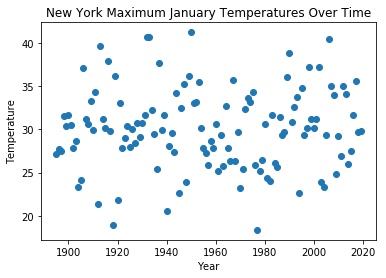

In [35]:
plt.scatter(nymaxtemp_data['Year'], nymaxtemp_data['Jan'])
plt.title('New York Maximum January Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

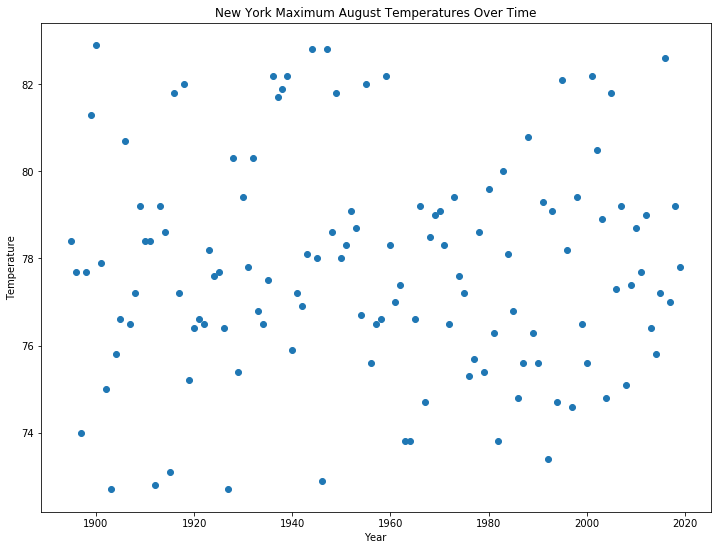

In [36]:
plt.scatter(nymaxtemp_data['Year'], nymaxtemp_data['Aug'])
plt.title('New York Maximum August Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size
plt.show()

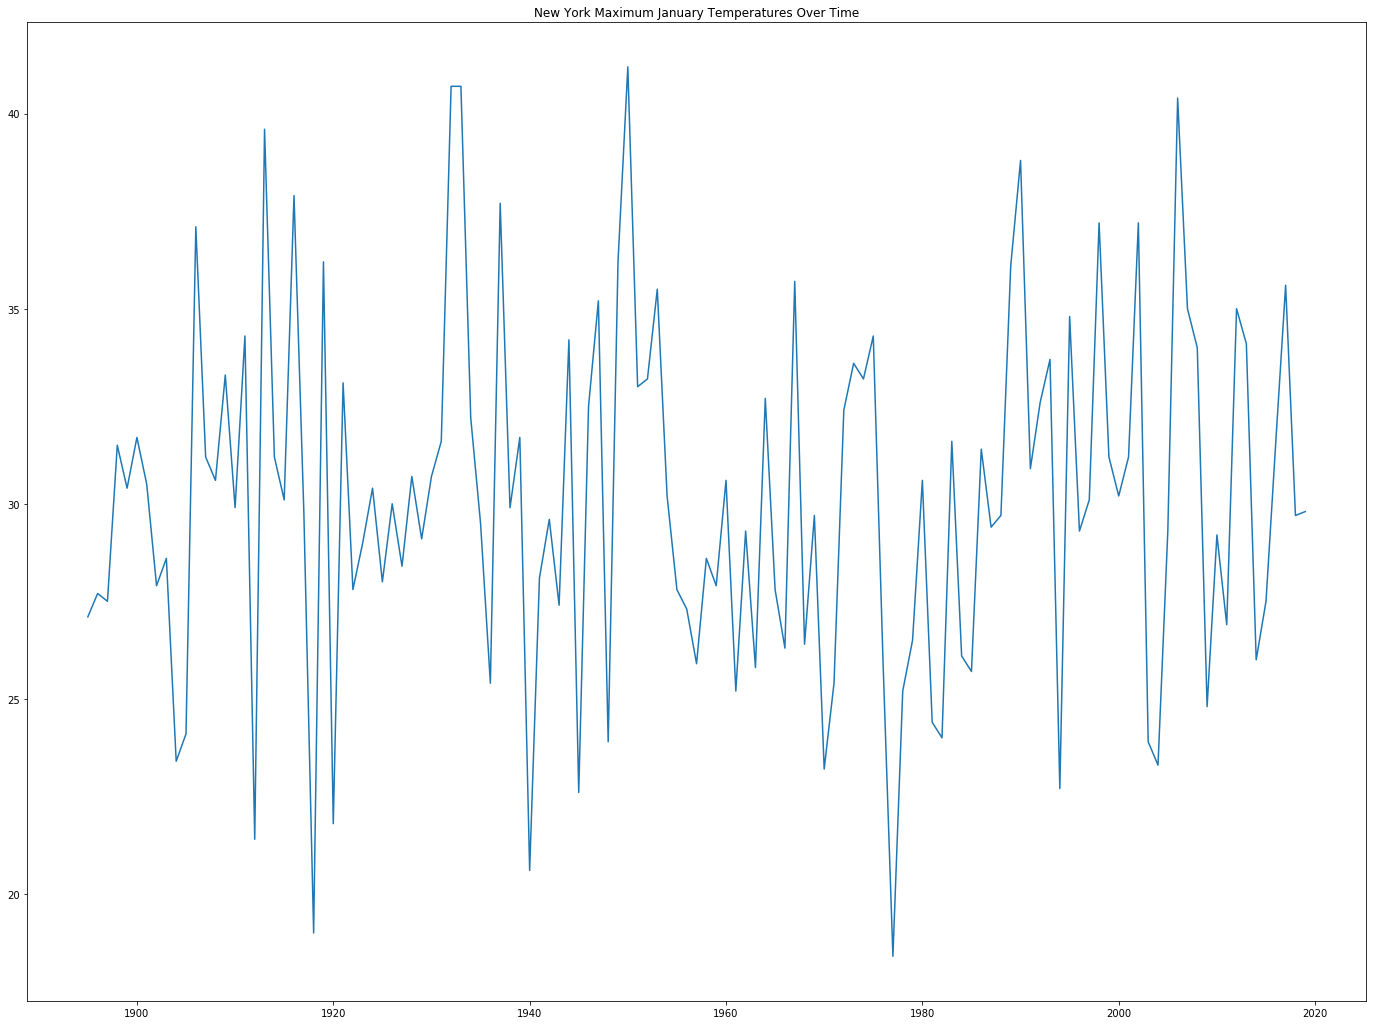

In [37]:
plt.plot(nymaxtemp_data["Year"], nymaxtemp_data["Jan"])
plt.title('New York Maximum January Temperatures Over Time')
plt.show()

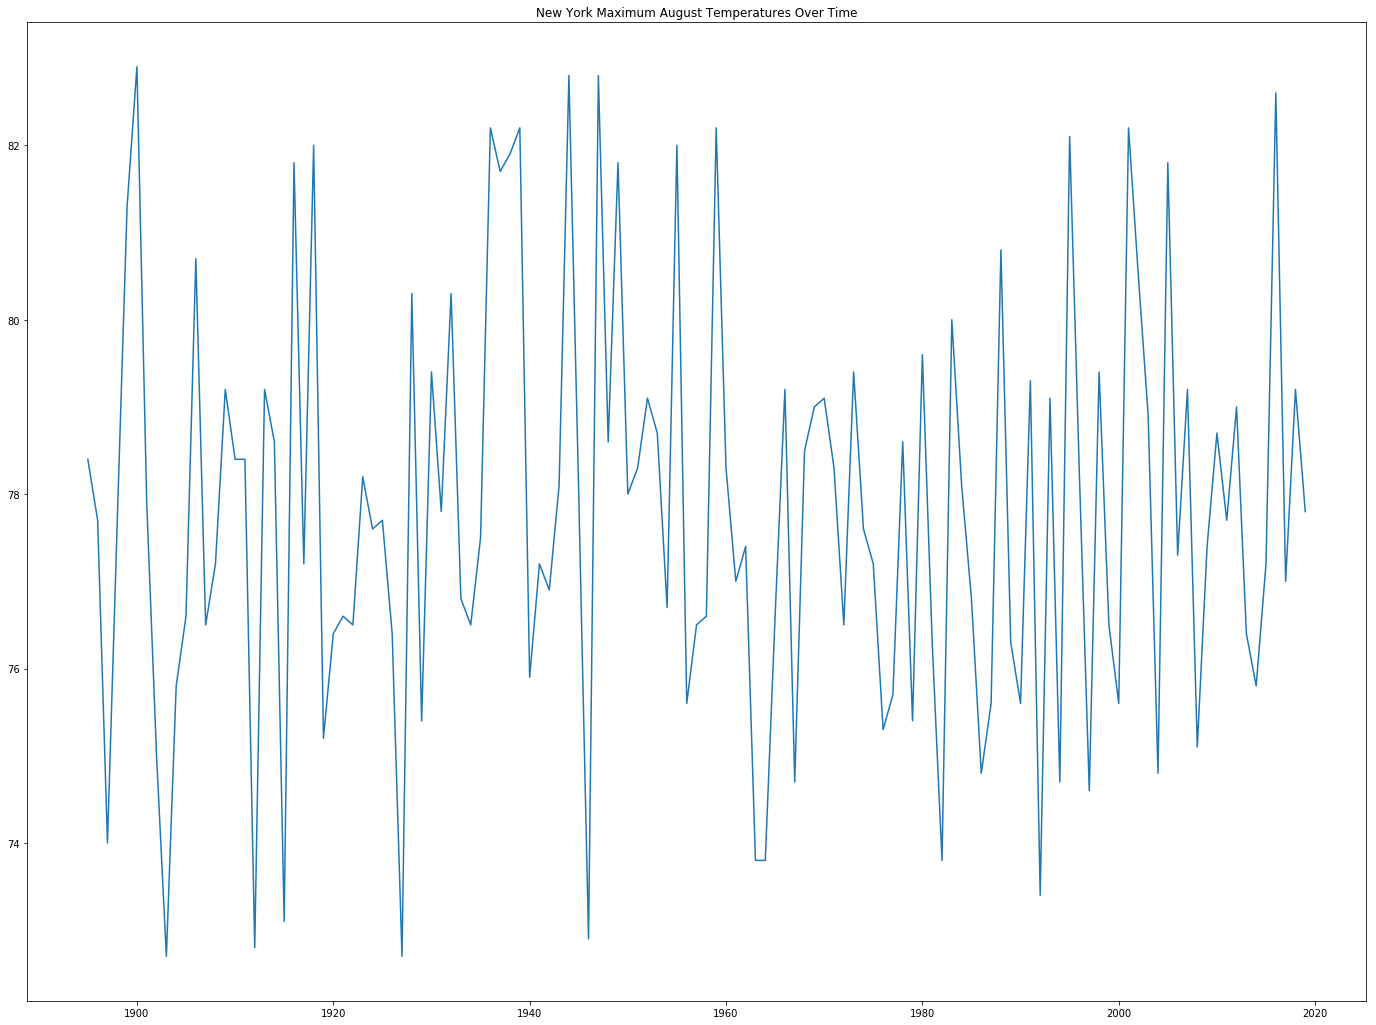

In [38]:
plt.plot(nymaxtemp_data["Year"], nymaxtemp_data["Aug"])
plt.title('New York Maximum August Temperatures Over Time')
plt.show()

After anaylizing the data above I was curious to compare the data between New York and California since California lately had some dry seasons.

### California Temperature Data

In [39]:
camaxtemp_data = maxtemp_data.loc[maxtemp_data["State"] == 4]
camaxtemp_data = camaxtemp_data.loc[maxtemp_data["Division"] == 1]
camaxtemp_data.tail(10)

,State,Division,Element,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
3115,4,1,27,2010,48.5,51.3,54.9,55.5,60.8,72.9,83.7,81.5,78.0,66.2,52.2,47.1
3116,4,1,27,2011,51.5,49.7,49.9,56.1,62.1,71.6,79.6,82.3,81.7,66.0,52.6,50.6
3117,4,1,27,2012,50.7,52.1,51.0,59.5,69.2,73.1,81.7,86.2,82.6,68.8,55.4,45.3
3118,4,1,27,2013,48.3,53.3,58.8,64.1,69.9,77.5,86.8,82.1,75.3,66.8,58.4,50.0
3119,4,1,27,2014,56.0,52.3,58.2,64.2,71.2,78.4,86.7,83.5,79.7,69.4,56.3,49.7
3120,4,1,27,2015,55.5,58.2,63.3,63.5,68.4,82.8,83.5,82.8,78.2,72.9,53.3,45.2
3121,4,1,27,2016,47.2,57.0,55.6,65.3,69.2,78.2,82.9,84.9,78.1,61.0,55.7,45.8
3122,4,1,27,2017,44.9,48.8,56.3,57.7,70.8,77.4,86.2,86.7,77.9,69.0,52.9,51.3
3123,4,1,27,2018,50.6,52.9,53.7,60.6,69.7,77.7,86.8,83.5,78.1,68.3,58.6,47.8
3124,4,1,27,2019,51.0,43.2,53.6,62.4,66.2,78.3,82.2,84.8,74.8,NaN,NaN,NaN


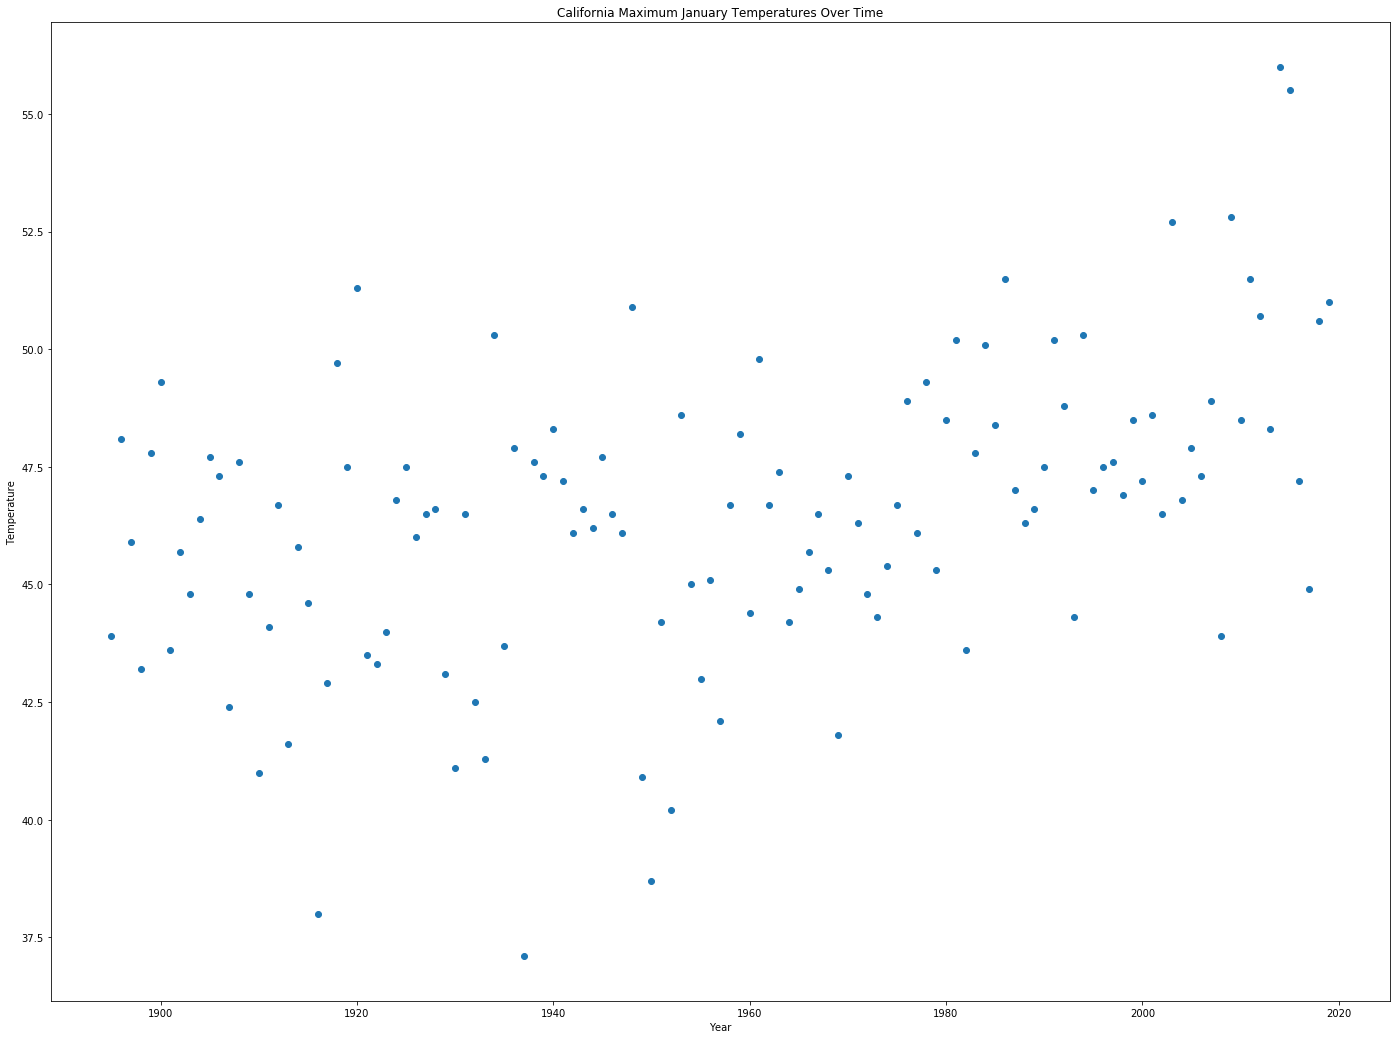

In [40]:
plt.scatter(camaxtemp_data['Year'], camaxtemp_data['Jan'])
plt.title('California Maximum January Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

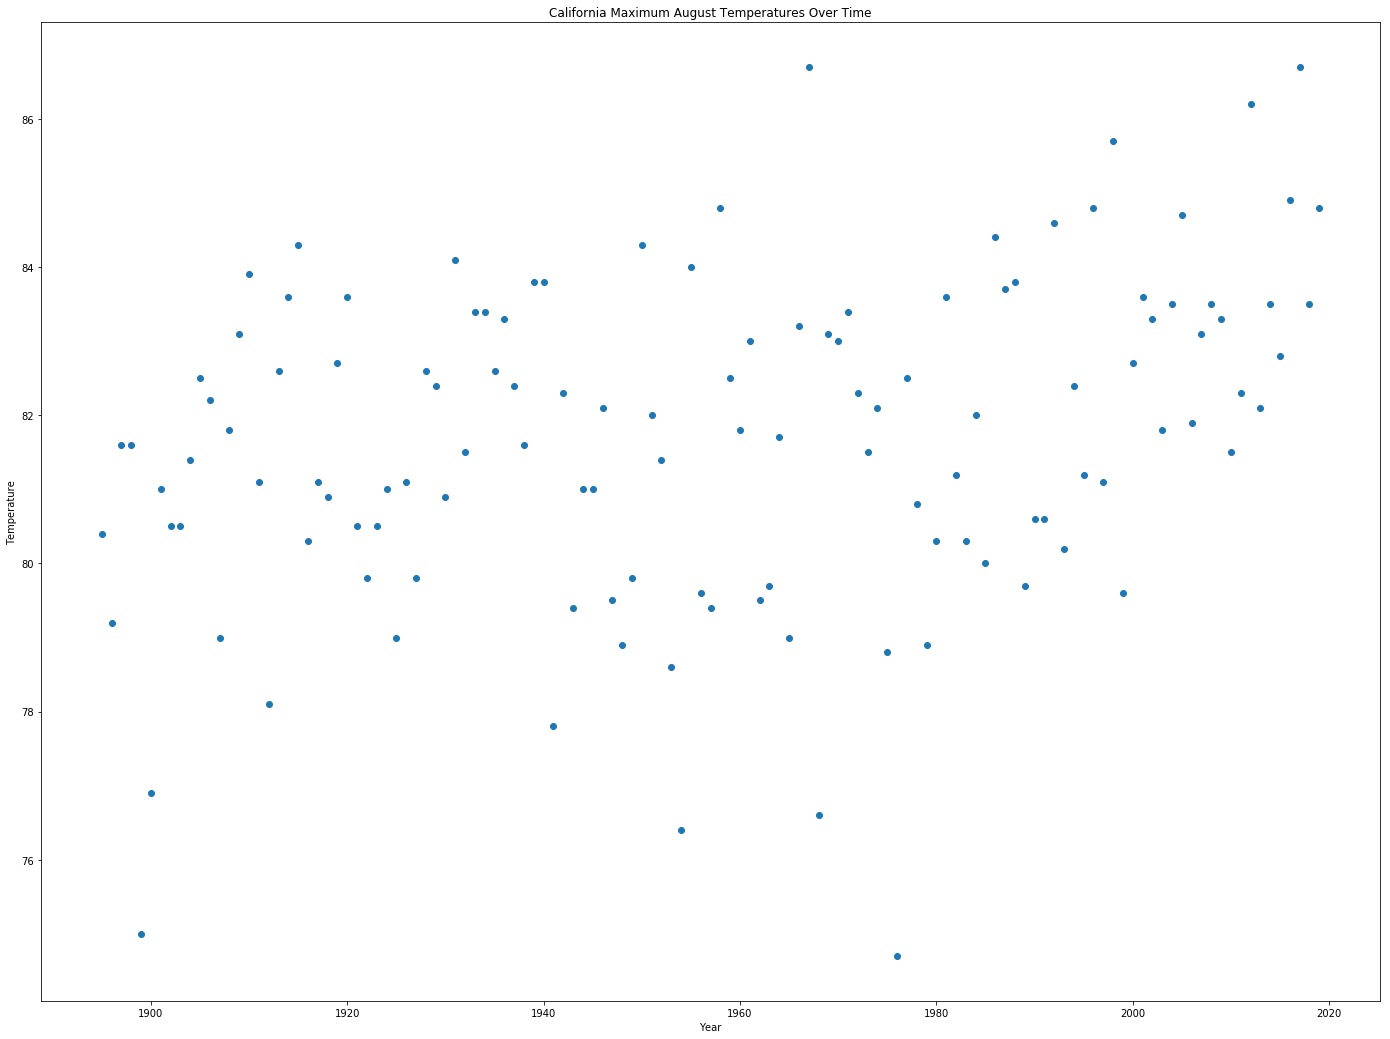

In [41]:
plt.scatter(camaxtemp_data['Year'], camaxtemp_data['Aug'])
plt.title('California Maximum August Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

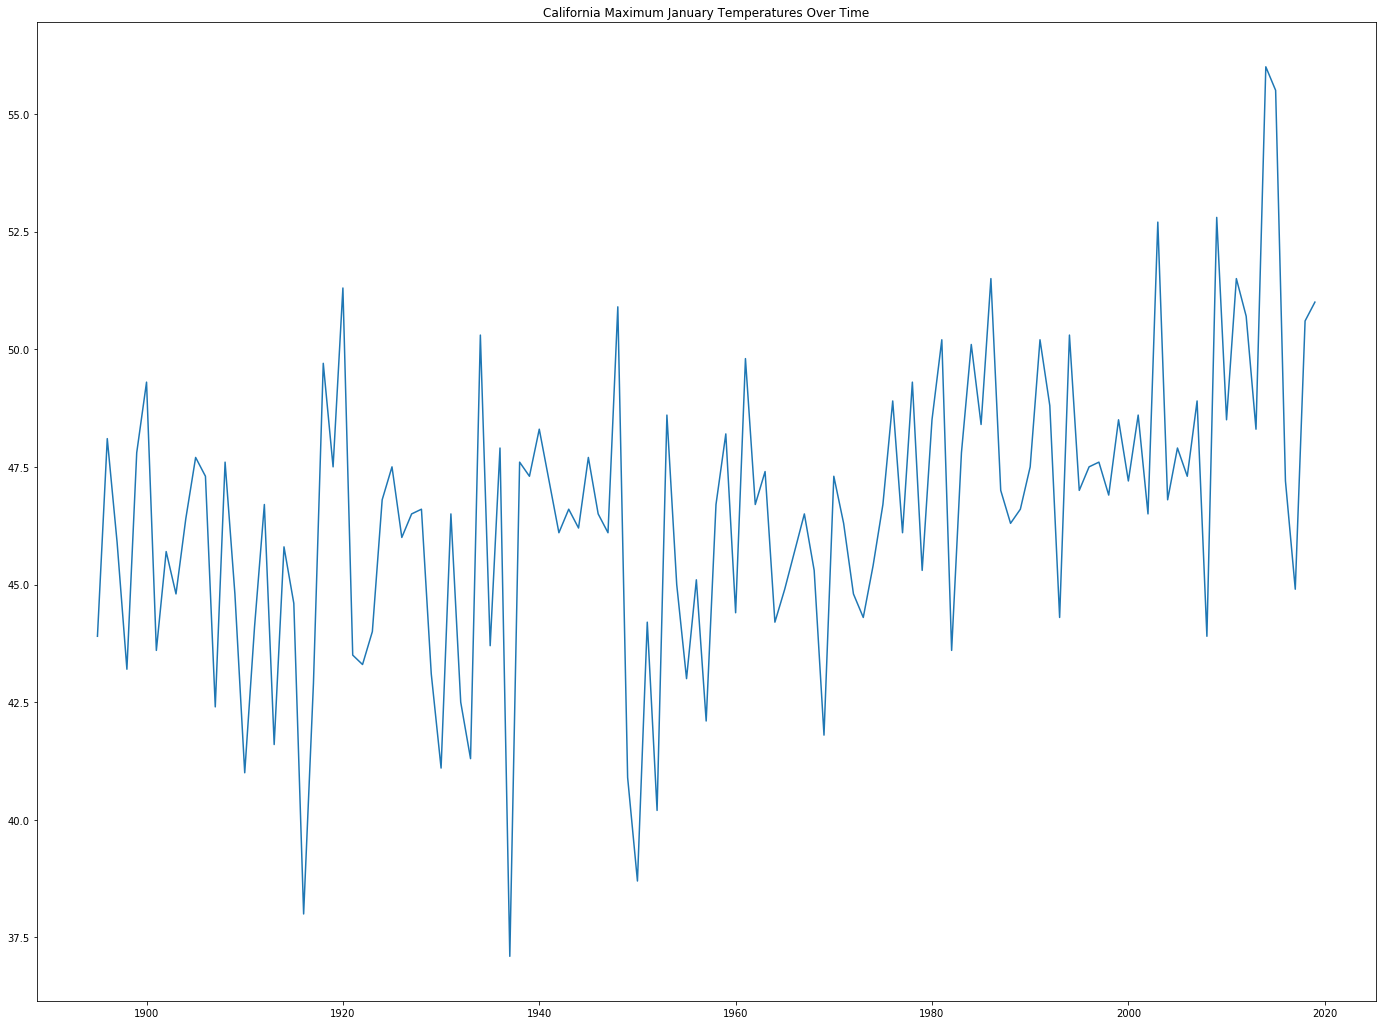

In [42]:
plt.plot(camaxtemp_data["Year"], camaxtemp_data["Jan"])
plt.title('California Maximum January Temperatures Over Time')
plt.show()

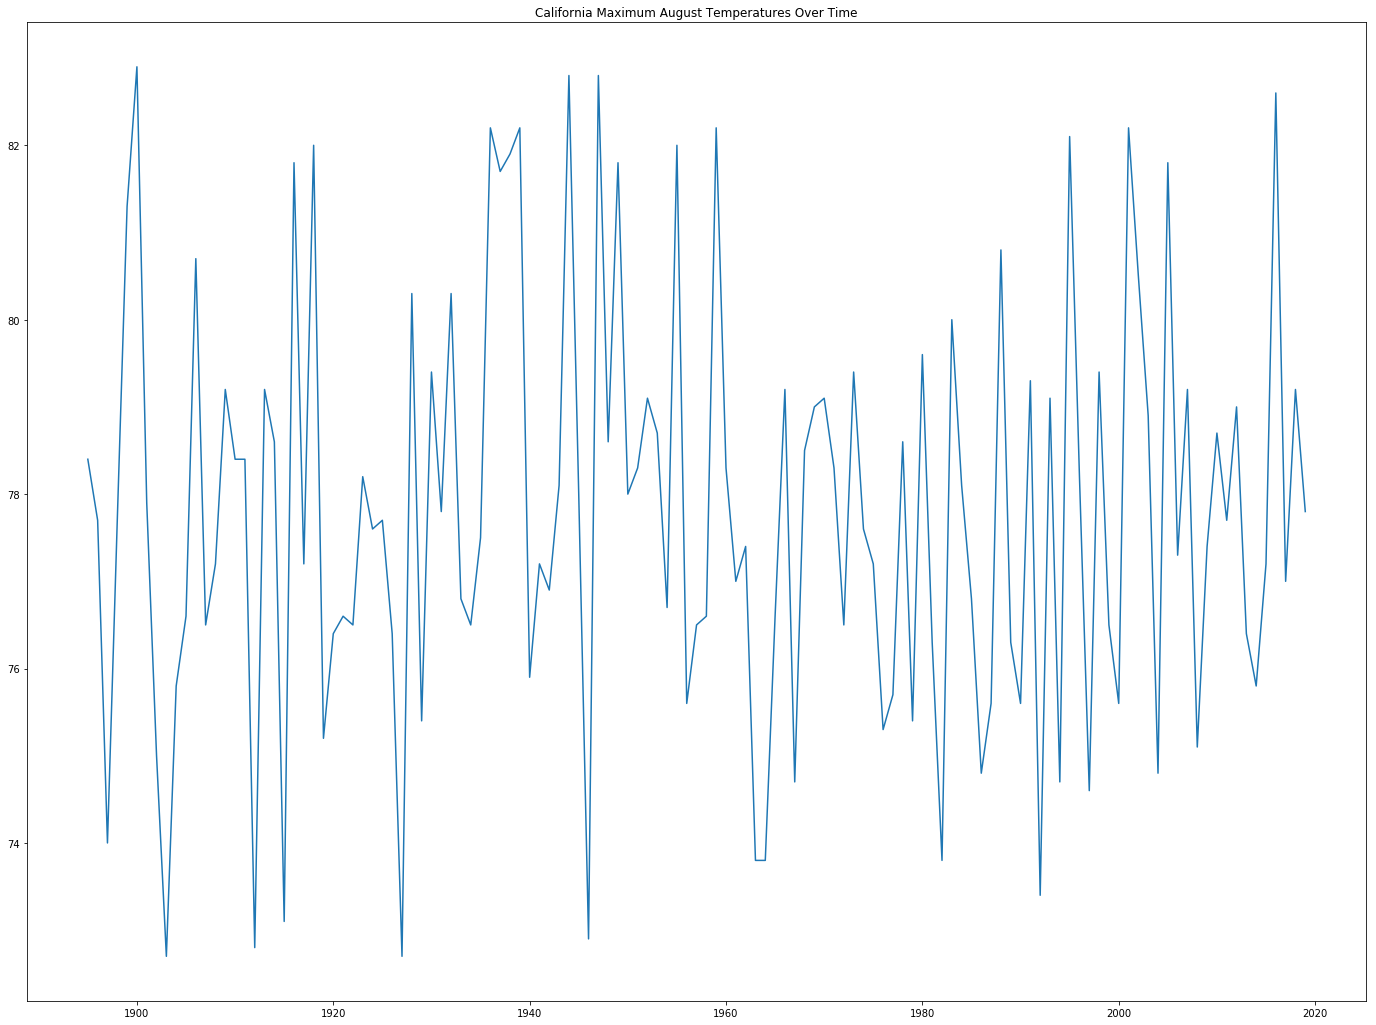

In [43]:
plt.plot(nymaxtemp_data["Year"], nymaxtemp_data["Aug"])
plt.title('California Maximum August Temperatures Over Time')
plt.show()

Looking at the yearly avarage of the maximum temperatures. Showing the last 10 years.

In [44]:
maxtemp_data['Average'] = maxtemp_data.iloc[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].mean(axis=1)
maxtemp_data.tail(10)

,State,Division,Element,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
44225,50,13,27,2010,31.5,29.9,26.0,35.0,42.8,47.9,52.3,54.0,52.8,42.7,37.3,31.9,40.341667
44226,50,13,27,2011,34.0,35.6,35.5,36.9,44.6,48.1,52.5,55.8,49.0,44.3,37.4,33.2,42.241667
44227,50,13,27,2012,24.4,33.6,26.6,35.6,40.8,49.0,52.9,55.8,49.5,44.2,35.3,33.9,40.133333
44228,50,13,27,2013,34.7,31.4,34.4,36.8,42.2,51.0,57.3,56.4,51.9,47.4,40.6,39.1,43.600000
44229,50,13,27,2014,38.1,33.6,35.5,42.0,47.5,52.3,57.8,59.4,54.5,43.7,41.2,37.6,45.266667
44230,50,13,27,2015,34.6,37.3,36.9,38.6,46.8,52.6,54.7,56.1,52.0,46.3,39.4,36.2,44.291667
44231,50,13,27,2016,35.5,37.8,36.5,43.7,48.7,53.6,58.8,58.2,55.2,48.2,38.6,36.4,45.933333
44232,50,13,27,2017,31.7,32.1,33.5,39.9,46.5,52.4,55.4,55.3,51.0,45.9,42.9,37.1,43.641667
44233,50,13,27,2018,34.0,39.8,39.9,42.8,45.1,51.1,54.9,56.7,54.5,47.2,41.7,33.5,45.100000
44234,50,13,27,2019,35.8,40.5,38.9,41.6,47.0,52.4,58.9,61.0,54.9,NaN,NaN,NaN,47.888889


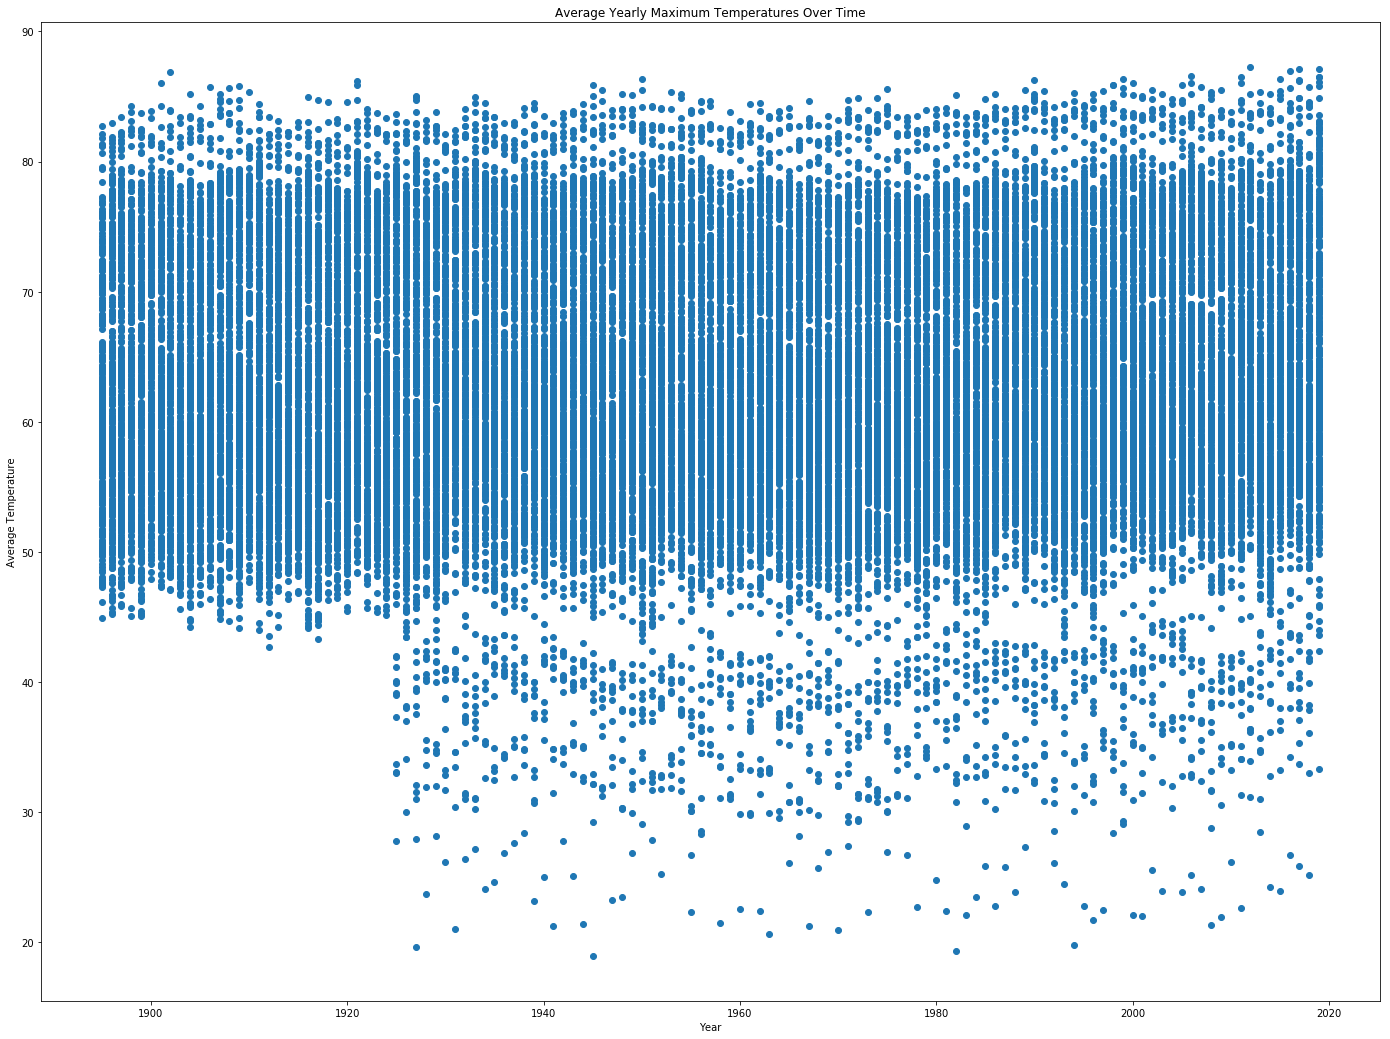

In [45]:
plt.scatter(maxtemp_data['Year'], maxtemp_data['Average'])
plt.title('Average Yearly Maximum Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()

Land Temperature Data (1850-2015) taken from kaggle.com. Download the data as csv onto my computer. In the table will be visiable only the last five months of 2015. Due to the large dataset will work with small data amount.

In [46]:
avgsurfacetemp_data = pd.read_csv(r'C:\Users\test\Desktop\test\GlobalTemperatures.csv') #This is the location of the csv file in my computer.
avgsurfacetemp_data.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [47]:
avgsurfacetemp_data = avgsurfacetemp_data[["dt", "LandAverageTemperature", "LandAverageTemperatureUncertainty"]]
avgsurfacetemp_data.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072
3188,2015-09-01,12.999,0.079
3189,2015-10-01,10.801,0.102
3190,2015-11-01,7.433,0.119
3191,2015-12-01,5.518,0.100


In [48]:
avgsurfacetemp_data["dt"] = avgsurfacetemp_data.dt.astype(str)
avgsurfacetemp_data["Month"] = avgsurfacetemp_data.dt.str[5] + avgsurfacetemp_data.dt.str[6]
avgsurfacetemp_data["Day"] = avgsurfacetemp_data.dt.str[8] + avgsurfacetemp_data.dt.str[9]
avgsurfacetemp_data["Year"] = avgsurfacetemp_data.dt.str[0] + avgsurfacetemp_data.dt.str[1] + avgsurfacetemp_data.dt.str[2] + avgsurfacetemp_data.dt.str[3]

In [49]:
avgsurfacetemp_data = avgsurfacetemp_data[["Year", "Month", "LandAverageTemperature", "LandAverageTemperatureUncertainty"]]
avgsurfacetemp_data = avgsurfacetemp_data.convert_objects(convert_numeric=True)
avgsurfacetemp_data.head()

C:\Users\test\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,Year,Month,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,1,3.034,3.574
1,1750,2,3.083,3.702
2,1750,3,5.626,3.076
3,1750,4,8.490,2.451
4,1750,5,11.573,2.072


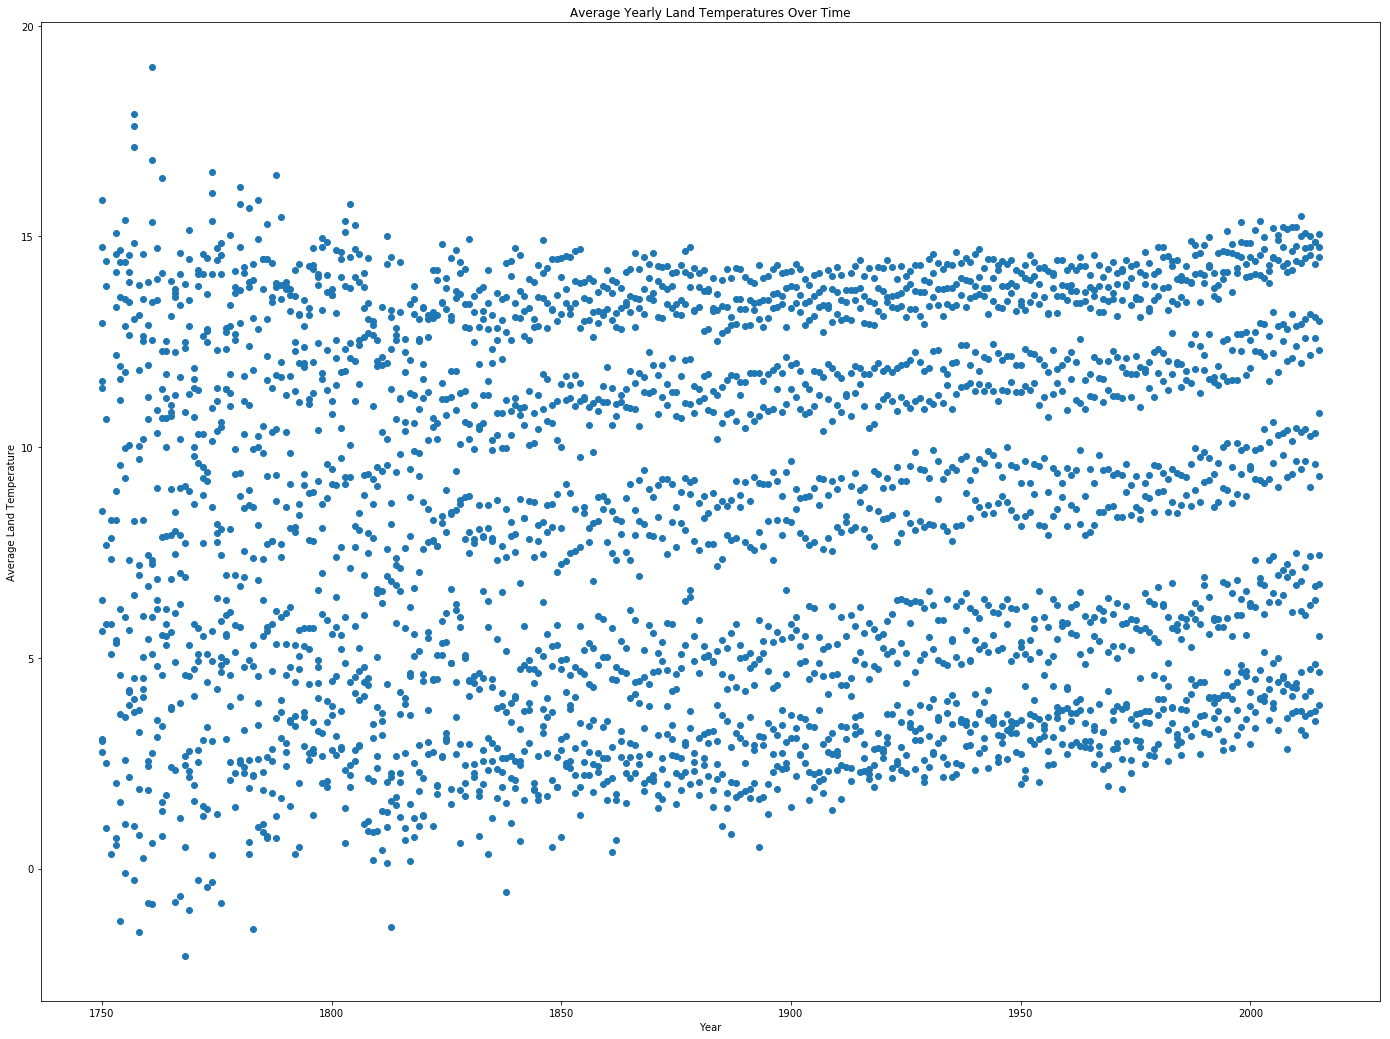

In [50]:
plt.scatter(avgsurfacetemp_data['Year'], avgsurfacetemp_data['LandAverageTemperature'])
plt.title('Average Yearly Land Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Average Land Temperature')
plt.show()

In [51]:
janavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 1]
febavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 2]
maravgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 3]
apravgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 4]
mayavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 5]
junavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 6]
julavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 7]
augavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 8]
sepavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 9]
octavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 10]
novavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 11]
decavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 12]

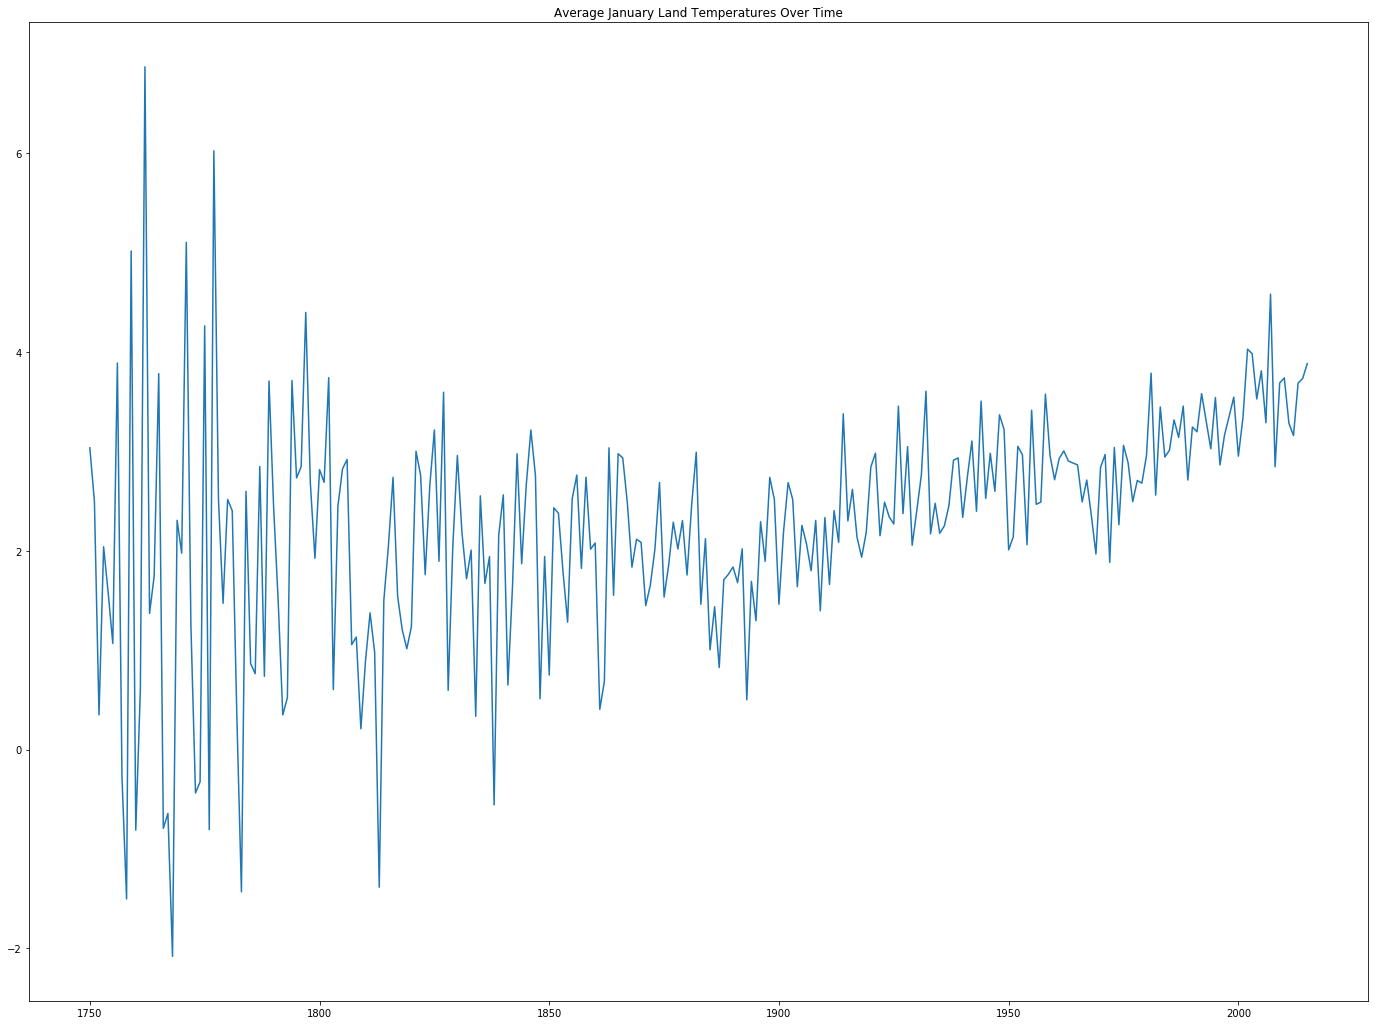

In [52]:
plt.plot(janavgsurfacetemp_data["Year"], janavgsurfacetemp_data["LandAverageTemperature"])
plt.title('Average January Land Temperatures Over Time')
plt.show()

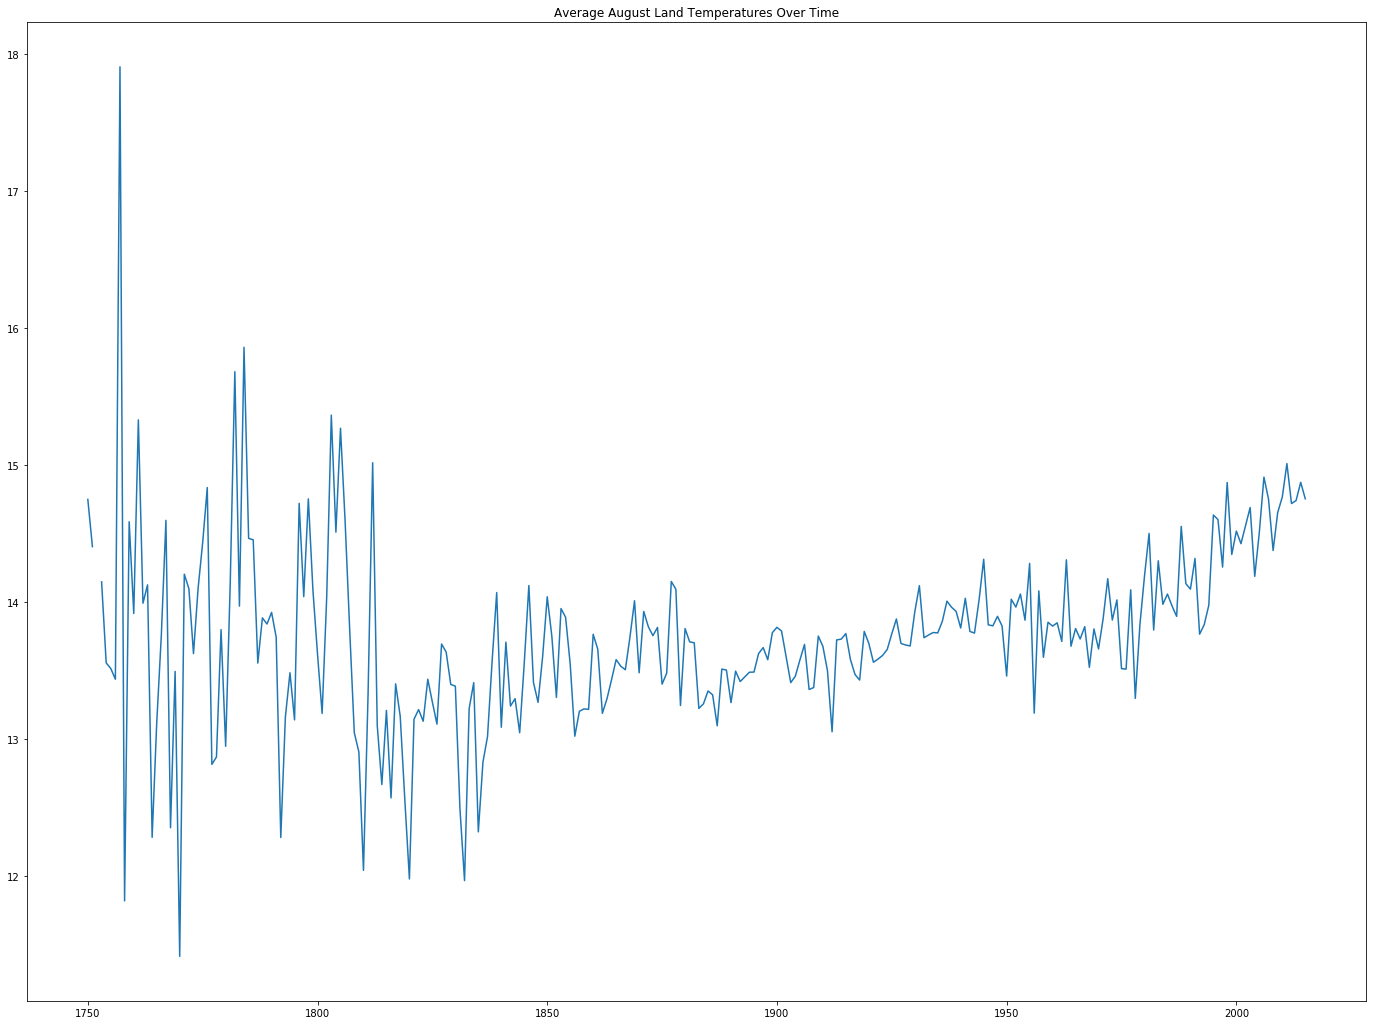

In [53]:
plt.plot(augavgsurfacetemp_data["Year"], augavgsurfacetemp_data["LandAverageTemperature"])
plt.title('Average August Land Temperatures Over Time')
plt.show()

## Conclusion

The data I have analyzed shows that temperatures are rising and the climate change is real, and we should be concerned about it. 